In [2]:
import glob
import rasterio as rio
from rasterio import mask, features
import numpy as np
import shapely.wkt as wkt
import pandas as pd
import seaborn as sns

sub_area = wkt.loads("MULTIPOLYGON (((77462.8497438607 73703.6291953883,75345.6534984474 73935.3621177719,75366.720127755 74009.0953203485,74843.5654999498 74153.050620617,74836.5432901806 74184.6505645784,74889.2098634495 74542.7832628075,74854.0988146036 74985.182478267,74861.1210243728 75301.1819178809,74882.1876536804 75536.4259451491,74959.4319611415 75813.8032310324,76511.3403201343 75448.6483230341,76967.7839551322 75329.2707569577,76985.3394795552 74995.7157929208,77564.671785514 74005.5842154639,77462.8497438607 73703.6291953883)))")


car_dataset = rio.open('car_raster.tif', 'r', crs='EPSG:2169')
cars, transf_car =  rio.mask.mask(car_dataset, [sub_area], crop=True, indexes=1)

results = []
result_files = glob.glob('/mnt/ric_dais_nfs_maccari/gabriel/results/WONS23/*/luxemburg/threestep/0/r1/1/4.0/*/viewshed.tif')
for f in result_files:
    run_t, city, strategy, subarea, ranking, k, ratio, dens = f.split('/')[6:-1]
    dataset = rio.open(f, 'r', crs='EPSG:2169')
    res, transf =  rio.mask.mask(dataset, [sub_area], crop=True, indexes=1)
    final_res = np.where(res>0, cars, 0)
    bool_res = np.where(res>1, 1, 0)
    results.append({'run_t': run_t, 
                    'dens': int(dens), 
                    'covered_points': final_res.sum(),
                    'sum_cars': cars.sum(),
                    'tot_points': np.count_nonzero(cars),
                    'covered_points_bool': bool_res.sum(),
                    'cars_norm': final_res.sum()/cars.sum(),
                    'bool_norm': bool_res.sum()/np.count_nonzero(final_res)
                    })
res_df = pd.DataFrame(results)

,run_t,dens,covered_points,sum_cars,tot_points,covered_points_bool,cars_norm,bool_norm
0,results_cars_bool,75,2048551,2048899,143953,136448,0.999830,0.948175
1,results_cars_bool,15,1979038,2048899,143953,60018,0.965903,0.449907
2,results_cars_bool,135,2048551,2048899,143953,140662,0.999830,0.977458
3,results_cars_bool,105,2048551,2048899,143953,139654,0.999830,0.970453
4,results_cars_bool,165,2048551,2048899,143953,140662,0.999830,0.977458
5,results_cars_bool,45,2048512,2048899,143953,120134,0.999811,0.834838
6,results_cars,75,2047092,2048899,143953,112852,0.999118,0.788888
7,results_cars,105,2047561,2048899,143953,130101,0.999347,0.907918
8,results_cars,15,1983435,2048899,143953,58839,0.968049,0.463379
9,results_cars,165,2047564,2048899,143953,136739,0.999348,0.954222


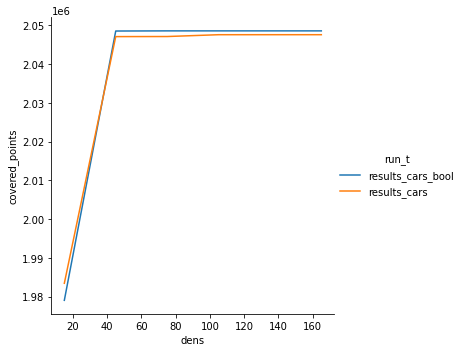

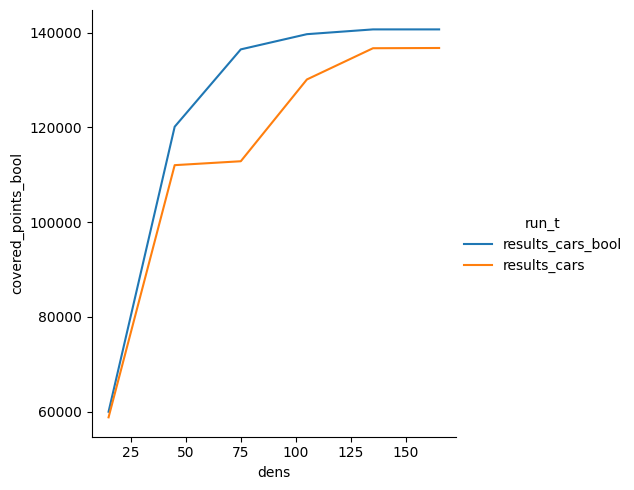

In [3]:
sns.relplot(data=res_df, x='dens', y='covered_points', kind='line', hue='run_t')
sns.relplot(data=res_df, x='dens', y='covered_points_bool', kind='line', hue='run_t')